In [1]:
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
''' 
Script: meanWRF_rr_wspd_boxplot.ipynb
Author: L Grimley
Last Updated: 8/20/24

Description: 
    This script generates a boxplot and stats on the mean rain rate and wind speed
    using present/future ensemble simulations for three hurricanes: Florence, Matthew, and Floyd

Inputs:
    - CSV with empirical distribution of rain rates/wind speeds generated using XXXXXX
    - Output directory

Outputs:
    - Boxplot of the mean rain rates/wind speeds for the three storms across the 2 climates
    - A tabular form of the boxplot information as a CSV
'''

In [2]:
# Update to the location where you want to save the output
os.chdir(r'Z:\users\lelise\projects\Carolinas_SFINCS\Chapter2_PGW\sfincs\03_OBS\analysis')
storms = ['flor', 'floy', 'matt']

In [3]:
''' RAIN RATE'''
# Load CSV with scale factors
rr = pd.read_csv(r'Z:\users\lelise\projects\Carolinas_SFINCS\Chapter2_PGW\wrf_analysis\scale_factors\scale_factors_carolinas'
                 r'\precip_thresh_5_to_100\precip_thresh_5_to_100_data.csv', header=0)
print(rr.head(3))

                  run_id     count       mean        std       min        1%  \
0  floyd_present_ensmean  539928.0  11.495614   6.188738  5.000023  5.063684   
1     floyd_present_ens1  475037.0  13.853985   9.973285  5.000003  5.077606   
2     floyd_present_ens2  452990.0  14.275266  10.111998  5.000015  5.076656   
3     floyd_present_ens3  488594.0  13.213113   9.084939  5.000069  5.074843   
4     floyd_present_ens4  554039.0  12.861785   8.786278  5.000027  5.075893   

        10%       25%        50%        75%        90%        99%        max  \
0  5.671410  6.902789   9.703644  14.149737  19.665987  33.782151  51.236458   
1  5.825693  7.288750  10.644218  16.637177  25.723993  53.223657  99.980255   
2  5.800445  7.289063  10.987497  17.666469  27.064326  52.300160  99.593124   
3  5.794322  7.187713  10.299351  15.709430  24.383065  48.279720  99.404976   
4  5.790072  7.169400  10.147367  15.298706  22.985658  47.684169  99.934204   

   loc      scale      popt        pco

In [6]:
# Get the rain rates for the future climate runs, remove the ensemble mean
rr_fut = rr[rr['climate'] == 'future']
rr_fut_ensmean = rr_fut[rr_fut['run'] == 'ensmean']
rr_fut_members = rr_fut[rr_fut['run'] != 'ensmean']

# Get the rain rates for the present climate runs, remove the ensemble mean
rr_pres = rr[rr['climate'] == 'present']
rr_pres_ensmean = rr_pres[rr_pres['run'] == 'ensmean']
rr_pres_members = rr_pres[rr_pres['run'] != 'ensmean']

# Combine present and future member rain rates into a single dataframe
combined = pd.concat([rr_pres_members, rr_fut_members], axis=0, ignore_index=True)
combined.set_index(['run_id'], inplace=True)

In [8]:
# Calculate std of the mean
stats = pd.DataFrame()
for storm in ['florence', 'floyd', 'matthew']:
    stats_list = [f'{storm}']
    # Select all the model runs based on the STORM and the CLIMATE
    # Present data
    runs1 = [x for x in combined.index if storm in x and 'present' in x]
    d1 = combined[combined.index.isin(runs1)]

    # Future data
    runs2 = [x for x in combined.index if storm in x and 'future' in x]
    d2 = combined[combined.index.isin(runs2)]

    for s in ['mean', '50%', '90%']:
        # Future minus Present
        diff = d2[s].values - d1[s].values
        # Get the standard deviation of the mean
        std = np.std(diff)
        stats_list.append(diff.mean())
        stats_list.append(std)
        
    stats_df = pd.DataFrame(stats_list).T
    stats_df.columns = ['event', 'mean', 'mean_std', '50%', '50%_std', '90%', '90%_std']
    stats = pd.concat([stats, stats_df], axis=0)

stats.set_index('event', inplace=True, drop=True)
stats = stats.astype(float).round(2)

print(stats)

          mean  mean_std   50%  50%_std    90%  90%_std
event                                                  
florence  4.15      1.31  2.16     1.08  11.69     2.89
floyd     2.64      0.31  1.78     0.16   6.00     0.84
matthew   3.36      0.53  1.68     0.54   9.41     1.79


In [11]:
''' WIND SPEED '''
ws = pd.read_csv(r'Z:\users\lelise\projects\Carolinas_SFINCS\Chapter2_PGW\wrf_analysis\scale_factors'
                 r'\scale_factors_carolinas_landMask\wind_spd_thresh_10_to_100\wind_spd_thresh_10_to_100_data.csv',
                 header=0)
print(ws.head(3))

ws_fut = ws[ws['climate'] == 'future']
ws_fut_ensmean = ws_fut[ws_fut['run'] == 'ensmean']
ws_fut_members = ws_fut[ws_fut['run'] != 'ensmean']
ws_pres = ws[ws['climate'] == 'present']
ws_pres_ensmean = ws_pres[ws_pres['run'] == 'ensmean']
ws_pres_members = ws_pres[ws_pres['run'] != 'ensmean']
combined = pd.concat([ws_pres_members, ws_fut_members], axis=0, ignore_index=True)
combined.set_index(['run_id'], inplace=True)

                  run_id     count       mean       std        min         1%  \
0  floyd_present_ensmean  293292.0  19.701757  7.034639  10.000025  10.125076   
1     floyd_present_ens1  279379.0  20.457485  7.732328  10.000002  10.094735   
2     floyd_present_ens2  292755.0  20.243269  7.763153  10.000026  10.102933   

         10%        25%        50%        75%        90%        99%  \
0  11.073523  12.798421  18.890141  25.862102  29.132063  34.307888   
1  10.974251  13.038087  19.581287  27.197263  30.868362  36.795455   
2  10.983866  12.604679  19.132647  27.050004  30.664413  37.321355   

         max  climate  storm      run  
0  37.747700  present  floyd  ensmean  
1  45.830990  present  floyd     ens1  
2  47.102318  present  floyd     ens2  


In [12]:
# Calculate std of the mean
stats = pd.DataFrame()
for storm in ['florence', 'floyd', 'matthew']:
    stats_list = [f'{storm}']

    runs1 = [x for x in combined.index if storm in x and 'present' in x]
    d1 = combined[combined.index.isin(runs1)]

    runs2 = [x for x in combined.index if storm in x and 'future' in x]
    d2 = combined[combined.index.isin(runs2)]

    for s in ['mean', '50%', '90%']:
        diff = d2[s].values - d1[s].values
        std = np.std(diff)
        stats_list.append(diff.mean())
        stats_list.append(std)
    stats_df = pd.DataFrame(stats_list).T
    stats_df.columns = ['event', 'mean', 'mean_std', '50%', '50%_std', '90%', '90%_std']
    stats = pd.concat([stats, stats_df], axis=0)
stats.set_index('event', inplace=True, drop=True)
stats = stats.astype(float).round(2)

print(stats)

          mean  mean_std   50%  50%_std   90%  90%_std
event                                                 
florence -0.31      0.56 -0.68     0.58 -0.14     1.02
floyd     0.72      0.33  0.80     0.83  0.50     0.33
matthew   0.07      1.04 -0.18     0.71  0.94     2.62


In [13]:
''' PLOT '''
# Organize the data for plotting 
ds_plot = [rr_pres_members[['mean', 'storm']],
           rr_fut_members[['mean', 'storm']],
           ws_pres_members[['mean', 'storm']],
           ws_fut_members[['mean', 'storm']]]
# Plot subplots
nrow = 2
ncol = 2

In [ ]:
# Plot format
font = {'family': 'Arial', 'size': 10}
mpl.rc('font', **font)
mpl.rcParams.update({'axes.titlesize': 10})
mpl.rcParams["figure.autolayout"] = True
props = dict(boxes="white", whiskers="black", caps="black")
boxprops = dict(facecolor='white', linestyle='--', linewidth=1, color='black')
flierprops = dict(marker='o', markerfacecolor='none', markersize=6, markeredgecolor='black')
medianprops = dict(linestyle='-', linewidth=2, color='black')
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='lightgrey', markersize=6)
n_subplots = nrow * ncol
first_in_row = np.arange(0, n_subplots, ncol)
last_in_row = np.arange(ncol - 1, n_subplots, ncol)
first_row = np.arange(0, ncol)
last_row = np.arange(first_in_row[-1], n_subplots, 1)

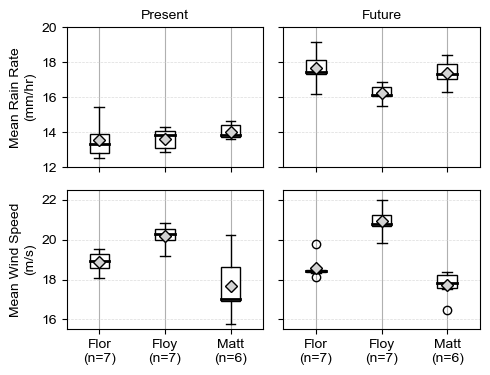

In [14]:
# PLOTTING Boxplot of flooded area
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, tight_layout=True, figsize=(5, 4))
axes = axes.flatten()
for ii in range(len(ds_plot)):
    ax = axes[ii]
    bp = ds_plot[ii].boxplot(ax=ax, by='storm',
                             vert=True, color=props, boxprops=boxprops, flierprops=flierprops,
                             medianprops=medianprops, meanprops=meanpointprops, meanline=False,
                             showmeans=True, patch_artist=True, zorder=1)
    ax.set_xlabel(None)
    ax.set_title('')
    if ii in first_row:
        ax.set_ylabel('Mean Rain Rate\n(mm/hr)')
        ax.set_ylim(12, 20)
        ax.xaxis.set_tick_params(labelbottom=False)
    if ii in last_row:
        ax.set_ylabel('Mean Wind Speed\n(m/s)')
        xtick = ax.get_xticks()
        ax.set_xticklabels(['Flor\n(n=7)', 'Floy\n(n=7)', 'Matt\n(n=6)'])
        ax.set_ylim(15.5, 22.5)
    if ii in last_in_row:
        ax.set_ylabel('')
        ax.yaxis.set_tick_params(labelbottom=False, labelleft=False)

axes[0].set_title('Present')
axes[1].set_title('Future')

for ax in axes:
    ax.set_xlabel('')
    kwargs = dict(linestyle='--', linewidth=0.5, color='lightgrey', alpha=0.8)
    ax.grid(visible=True, which='major', axis='y', zorder=0, **kwargs)
    kwargs = dict(linestyle='--', linewidth=0.5, color='lightgrey', alpha=0.8)
    ax.grid(visible=True, which='minor', axis='y', zorder=0, **kwargs)
    ax.set_axisbelow(True)

plt.suptitle(None)
plt.subplots_adjust(wspace=0, hspace=0)
plt.margins(x=0, y=0)
#plt.savefig(r'future_TC_vars_boxplot.png', bbox_inches='tight', dpi=255)
#plt.close()

In [18]:
var_stats = pd.DataFrame()
tracker = []
event_id = ['pres_rr', 'fut_rr', 'pres_ws', 'fut_ws']
counter = 0
# Loop through the boxplots and get specific stats for each variable
for ds in ds_plot:
    tracker.append(event_id[counter])
    df = ds.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95]).T
    var_stats = pd.concat([var_stats, df], ignore_index=False)
    for storm in ds.storm.unique():
        ds2 = ds[ds['storm'] == storm]
        df = ds2.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95]).T
        var_stats = pd.concat([var_stats, df], ignore_index=False)
        tracker.append(f'{event_id[counter]}_{storm}')
    counter += 1
var_stats.index = tracker
print(var_stats.head(4))
#var_stats.to_csv('wrf_var_stats.csv')

                  count       mean       std        min         5%        25%  \
pres_rr            20.0  13.710668  0.741370  12.519446  12.558498  13.169605   
pres_rr_floyd       7.0  13.621902  0.585544  12.861785  12.900446  13.101883   
pres_rr_matthew     6.0  14.030676  0.450905  13.612616  13.636434  13.734717   
pres_rr_florence    7.0  13.525142  1.037519  12.519446  12.531779  12.799818   

                        50%        75%        95%        max  
pres_rr           13.761544  14.192601  14.660091  15.434660  
pres_rr_floyd     13.853985  14.079254  14.242200  14.275266  
pres_rr_matthew   13.828750  14.400620  14.611174  14.619324  
pres_rr_florence  13.309184  13.906534  15.091781  15.434660  
